# Machine Learning - Regression Models

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
cars = pd.read_csv("Cars93.csv")

In [3]:
cars.drop(columns='Unnamed: 0', inplace=True)

In [4]:
cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
cars[['Weight','MPG.highway']].corr()

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


## Scatterplots

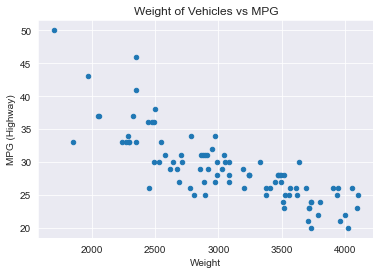

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

ax = cars.plot(title='Weight of Vehicles vs MPG', kind='scatter', x='Weight', y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
plt.show()

Calculating the regression line:

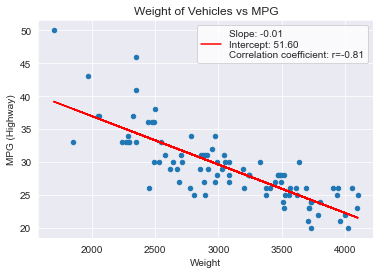

In [7]:
import scipy.stats

x=cars['Weight'].to_numpy()
y=cars['MPG.highway'].to_numpy()

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

ax = cars.plot(title='Weight of Vehicles vs MPG', kind='scatter', x='Weight', y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
ax.plot(x,intercept+slope*x, label = line, color='r')
ax.legend(facecolor='white')
plt.show()

## SciKit Learn Linear Regression

In [8]:
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
cars.drop(columns='Make',inplace=True)

In [10]:
cars["Manufacturer"].replace('Chrylser',"Chrysler",inplace=True)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

Checking for outliers:

In [12]:
def outlier_check(value, mean, std):
    if ((mean + 3*std) < value) or ((mean - 3*std)> value):
        return [True, value]
    else:
        return [False, value]
    
for x in list(cars.columns):
    try:
        outlier_list = []
        print("\n")
        print(x)
        for y in cars[x]:
            if outlier_check(y,cars[x].mean(),cars[x].std())[0]:
                outlier_list.append(outlier_check(y,cars[x].mean(),cars[x].std())[1])
        print(outlier_list)
    except:
        print("Non-numeric column")



Manufacturer
Non-numeric column


Model
Non-numeric column


Type
Non-numeric column


Min.Price
[45.4, 43.8]


Price
[61.9]


Max.Price
[80.0]


MPG.city
[46, 42]


MPG.highway
[50, 46]


AirBags
Non-numeric column


DriveTrain
Non-numeric column


Cylinders
Non-numeric column


EngineSize
[]


Horsepower
[]


RPM
[]


Rev.per.mile
[]


Man.trans.avail
Non-numeric column


Fuel.tank.capacity
[27.0]


Passengers
[]


Length
[]


Wheelbase
[]


Width
[]


Turn.circle
[]


Rear.seat.room
[]


Luggage.room
[]


Weight
[]


Origin
Non-numeric column


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
mean_imp = SimpleImputer(missing_values=np.nan,strategy='mean')

In [15]:
cars['Rear.seat.room'] = mean_imp.fit_transform(cars['Rear.seat.room'].values.reshape(-1,1))

cars['Luggage.room'] = mean_imp.fit_transform(cars['Luggage.room'].values.reshape(-1,1))

In [16]:
cars_dummies = pd.get_dummies(cars,columns=['Manufacturer','Model','Type',"AirBags",'DriveTrain',"Cylinders",'Man.trans.avail','Origin'])

In [17]:
y = cars["MPG.highway"]

X = cars_dummies
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [53]:
train_reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
predictions = train_reg.predict(X_test)

In [19]:
column_num = list(X_test.columns).index('MPG.highway')

In [54]:
predictions

array([26.02659942, 33.04724883, 24.01248188, 19.99334529, 27.99336907,
       26.02053365, 33.03494835, 33.97362098, 28.97834069, 26.04633656,
       37.93342836, 25.02345475, 24.97761901, 26.01404855, 33.02884447,
       26.07759376, 27.01996184, 33.03689596, 30.98868728, 27.96280676,
       27.00363122, 31.01993947, 27.02331741, 28.01201542])

In [60]:
y_test.std()

4.010854836782195

Intercept: 0.03
Coefficient of Determination: r=0.9999


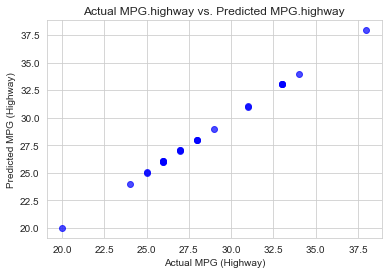

In [71]:
sns.set_style('whitegrid')
print(f'Intercept: {train_reg.intercept_:.2f}\nCoefficient of Determination: r={train_reg.score(X_test,y_test):.4f}')

plt.scatter(y_test.values, predictions,c='blue',alpha=0.7)
plt.title('Actual MPG.highway vs. Predicted MPG.highway')
plt.xlabel('Actual MPG (Highway)')
plt.ylabel('Predicted MPG (Highway)')
plt.show()

Appears to be near perfect match to actual values.

Residual scatter plot:

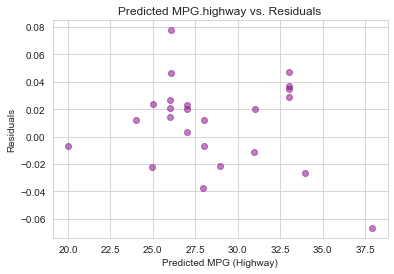

In [72]:
plt.scatter(predictions, predictions-y_test.values, c='purple',alpha=0.5)
plt.title('Predicted MPG.highway vs. Residuals')
plt.xlabel('Predicted MPG (Highway)')
plt.ylabel('Residuals')
plt.show()

No identifiable pattern, so the accruacy of the model seems to be plausible.

## Printed out equation for Equation of Best Fit

In [51]:
equation_of_best_fit = f'y = {test_reg.intercept_} '

for index in range(0,len(test_reg.coef_)):
    if index < len(test_reg.coef_):
        equation_of_best_fit = equation_of_best_fit + f"+ {test_reg.coef_[index]}x_{index} "
    else:
        equation_of_best_fit = equation_of_best_fit + f"+ {test_reg.coef_[index]}x_{index}"
        
print(equation_of_best_fit)

y = 0.45254634023671514 + -0.009722020561999872x_0 + 0.0007903187314385117x_1 + 0.006629391984487476x_2 + 0.041277511075673845x_3 + 0.9363239460310879x_4 + -0.04773632368848599x_5 + 0.0004032304153605004x_6 + -6.211498032898666e-05x_7 + -0.00026297690723955935x_8 + -0.011497537712660266x_9 + -0.05327258029366495x_10 + 0.005324286878805026x_11 + 0.023071106770207073x_12 + 0.002603540157811085x_13 + -0.021942067326780612x_14 + 0.006795848436532859x_15 + 0.01706208110495072x_16 + -0.00038848376254102535x_17 + 2.7755575615628914e-17x_18 + 0.027956959966838682x_19 + -1.734723475976807e-18x_20 + -0.01849419203499055x_21 + 1.734723475976807e-18x_22 + 0.015737952022360484x_23 + 0.0x_24 + -0.017817938405250578x_25 + 0.0x_26 + -0.0356953636859086x_27 + 0.0x_28 + -0.000620694593195581x_29 + 0.04449685308366403x_30 + 0.0x_31 + 0.0x_32 + -0.016631784049383896x_33 + 0.021428793177140616x_34 + 0.0x_35 + -0.04625873932838055x_36 + -0.06382862497007707x_37 + -0.038669040109102916x_38 + 0.03617177791163